#Group 2 - Dataminds - Final Project

In [40]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import re

warnings.filterwarnings("ignore")
%matplotlib inline

In [41]:
# Import data
df = pd.read_csv("Training Data.csv")

## 1. Stage 1

### 1.1 EDA


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236466 entries, 0 to 236465
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 236466 non-null  int64  
 1   Income             236466 non-null  int64  
 2   Age                236466 non-null  int64  
 3   Experience         236466 non-null  int64  
 4   Married/Single     236466 non-null  object 
 5   House_Ownership    236466 non-null  object 
 6   Car_Ownership      236466 non-null  object 
 7   Profession         236466 non-null  object 
 8   CITY               236465 non-null  object 
 9   STATE              236465 non-null  object 
 10  CURRENT_JOB_YRS    236465 non-null  float64
 11  CURRENT_HOUSE_YRS  236465 non-null  float64
 12  Risk_Flag          236465 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 23.5+ MB


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0.0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0.0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0.0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1.0
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1.0


In [5]:
# Pengelompokan
cats = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
nums = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

#### 1.1.1 Univariate Analisis

General Overview

In [6]:
df.describe(include='all')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,236466.000000,2.364660e+05,236466.000000,236466.000000,236466,236466,236466,236466,236465,236465,236465.000000,236465.000000,236465.000000
unique,NaN,NaN,NaN,NaN,2,3,2,52,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,212276,217641,165019,5639,1209,26722,NaN,NaN,NaN
mean,118233.500000,4.996817e+06,49.952276,10.094238,NaN,NaN,NaN,NaN,NaN,NaN,6.338638,11.996190,0.117924
std,68261.998715,2.878082e+06,17.068521,5.998132,NaN,NaN,NaN,NaN,NaN,NaN,3.645235,1.397636,0.322519
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,59117.250000,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,11.000000,0.000000
50%,118233.500000,5.000063e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,177349.750000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


##### 1.1.1.1 Numerical Feature

Descriptive statistics for Income:
count    2.364660e+05
mean     4.996817e+06
std      2.878082e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000063e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64


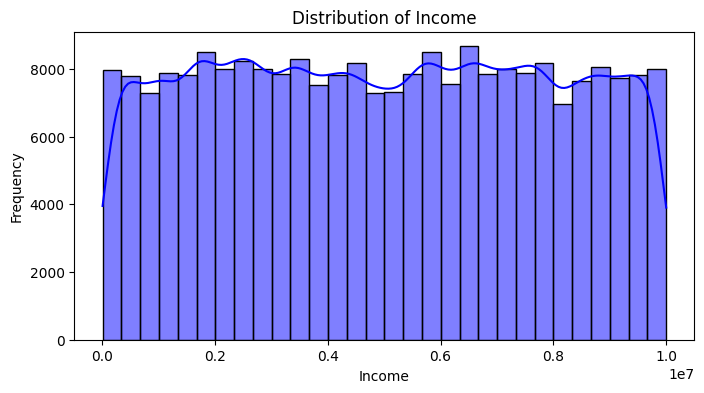

In [7]:
# Analysis of Income
print('Descriptive statistics for Income:')
print(df['Income'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Income'], kde=True, bins=30, color='blue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for Age:
count    236466.000000
mean         49.952276
std          17.068521
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64


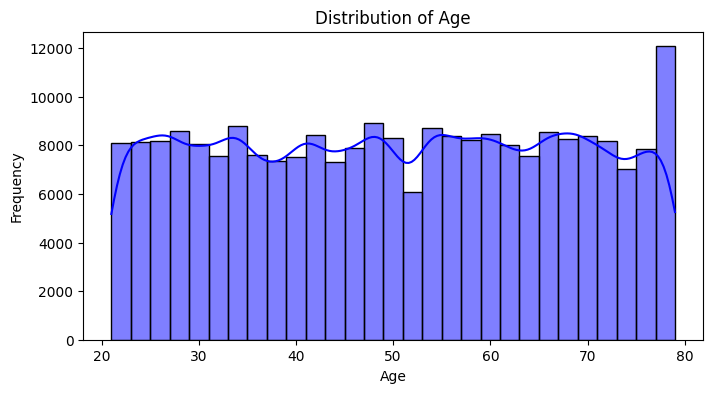

In [8]:
# Analysis of Age
print('Descriptive statistics for Age:')
print(df['Age'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=29, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for Experience:
count    236466.000000
mean         10.094238
std           5.998132
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Experience, dtype: float64


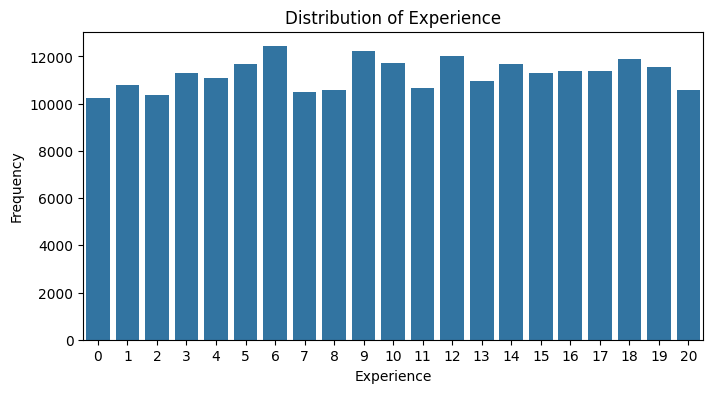

In [9]:
# Analysis of Experience
print('Descriptive statistics for Experience:')
print(df['Experience'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Experience')
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for CURRENT_JOB_YRS:
count    236465.000000
mean          6.338638
std           3.645235
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: CURRENT_JOB_YRS, dtype: float64


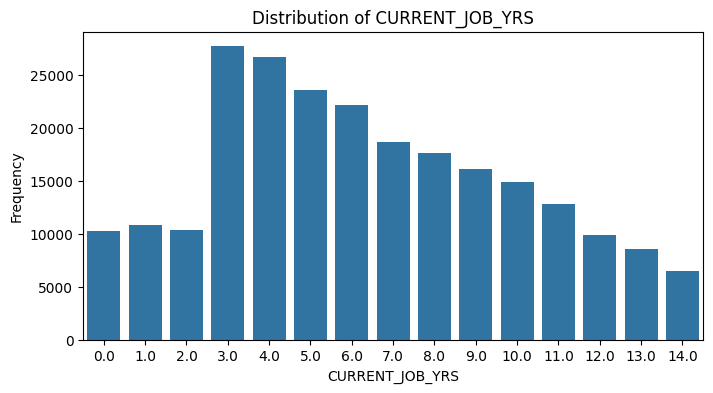

In [10]:
# Analysis of CURRENT_JOB_YRS
print('Descriptive statistics for CURRENT_JOB_YRS:')
print(df['CURRENT_JOB_YRS'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='CURRENT_JOB_YRS')
plt.title('Distribution of CURRENT_JOB_YRS')
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('Frequency')
plt.show()

Descriptive statistics for CURRENT_HOUSE_YRS:
count    236465.000000
mean         11.996190
std           1.397636
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: CURRENT_HOUSE_YRS, dtype: float64


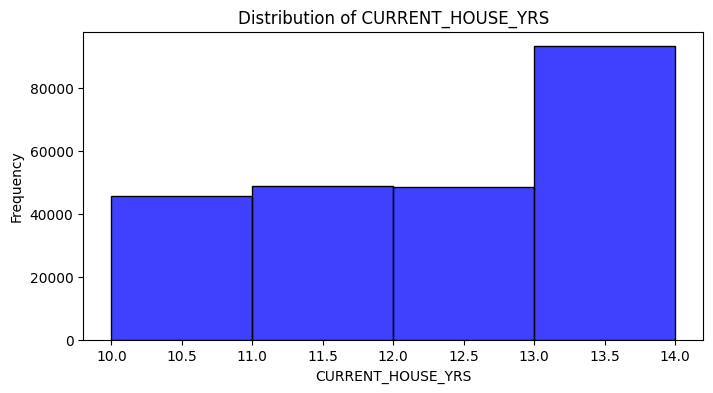

In [11]:
# Analysis of CURRENT_HOUSE_YRS
print('Descriptive statistics for CURRENT_HOUSE_YRS:')
print(df['CURRENT_HOUSE_YRS'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['CURRENT_HOUSE_YRS'], bins=4, color='blue')
plt.title('Distribution of CURRENT_HOUSE_YRS')
plt.xlabel('CURRENT_HOUSE_YRS')
plt.ylabel('Frequency')
plt.show()

##### 1.1.1.2 Categorical Feature

Descriptive statistics for Risk_Flag:
count    236465.000000
mean          0.117924
std           0.322519
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Risk_Flag, dtype: float64


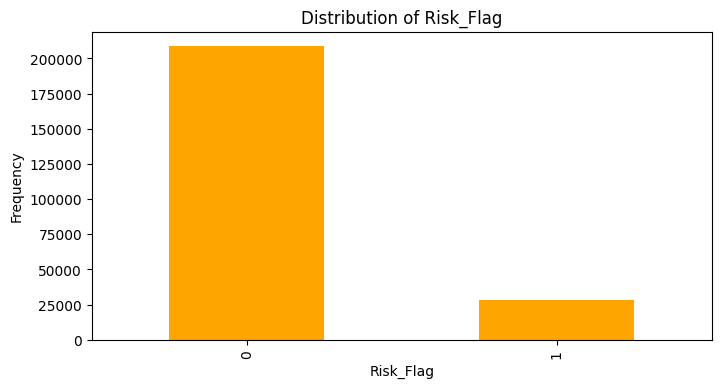

In [12]:
df = df[df['Risk_Flag'].notna()]
# Ensure Risk_Flag is binary and of type int
df['Risk_Flag'] = df['Risk_Flag'].astype(int)

# Descriptive statistics for Risk_Flag
print('Descriptive statistics for Risk_Flag:')
print(df['Risk_Flag'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
df['Risk_Flag'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Frequency')
plt.show()


Frequency distribution for Married/Single:
Married/Single
single     212275
married     24190
Name: count, dtype: int64


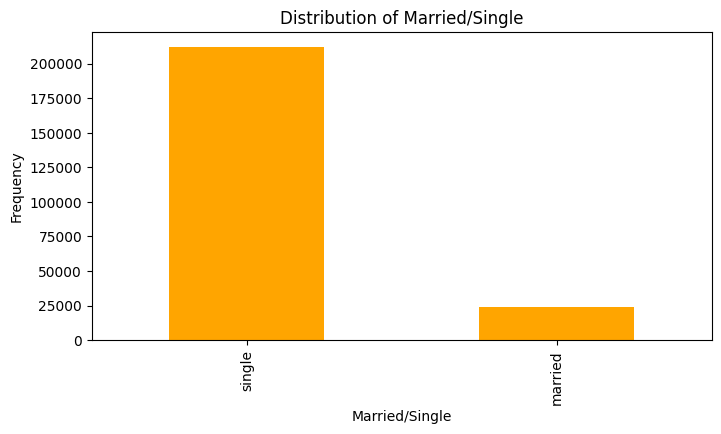

In [13]:
# Analysis of Married/Single
print('Frequency distribution for Married/Single:')
print(df['Married/Single'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['Married/Single'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Married/Single')
plt.xlabel('Married/Single')
plt.ylabel('Frequency')
plt.show()

Frequency distribution for House_Ownership:
House_Ownership
rented          217640
owned            12107
norent_noown      6718
Name: count, dtype: int64


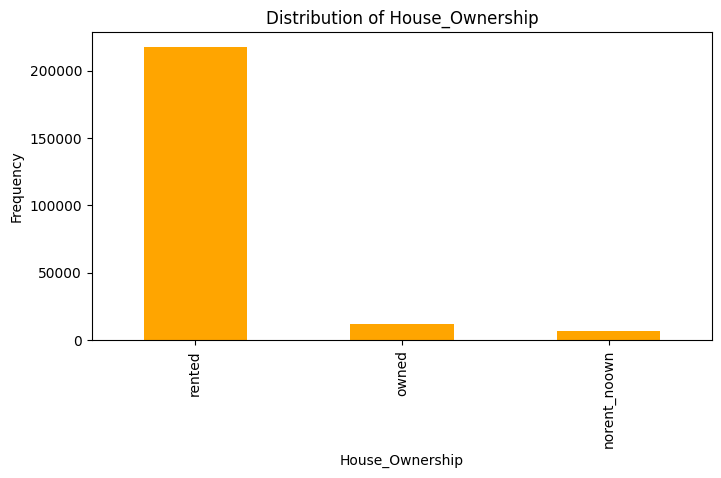

In [14]:
# Analysis of House_Ownership
print('Frequency distribution for House_Ownership:')
print(df['House_Ownership'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['House_Ownership'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of House_Ownership')
plt.xlabel('House_Ownership')
plt.ylabel('Frequency')
plt.show()

Frequency distribution for Car_Ownership:
Car_Ownership
no     165019
yes     71446
Name: count, dtype: int64


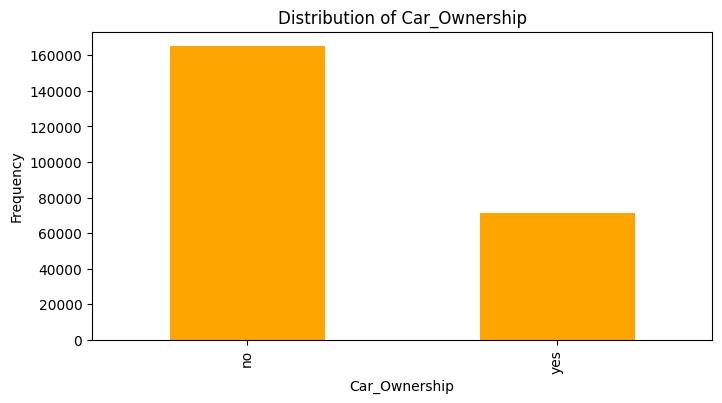

In [15]:
# Analysis of Car_Ownership
print('Frequency distribution for Car_Ownership:')
print(df['Car_Ownership'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['Car_Ownership'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Car_Ownership')
plt.xlabel('Car_Ownership')
plt.ylabel('Frequency')
plt.show()

Frequency distribution for Profession:
Profession
Physician                     5639
Statistician                  5507
Psychologist                  5096
Magistrate                    5087
Web_designer                  5074
Computer_hardware_engineer    5058
Fashion_Designer              5044
Drafter                       5030
Comedian                      4961
Air_traffic_controller        4950
Industrial_Engineer           4924
Chemical_engineer             4920
Mechanical_engineer           4918
Technical_writer              4886
Graphic_Designer              4869
Hotel_Manager                 4867
Financial_Analyst             4860
Biomedical_Engineer           4849
Flight_attendant              4826
Petroleum_Engineer            4774
Software_Developer            4758
Secretary                     4747
Police_officer                4725
Politician                    4654
Computer_operator             4652
Microbiologist                4566
Technician                    4541
Lawye

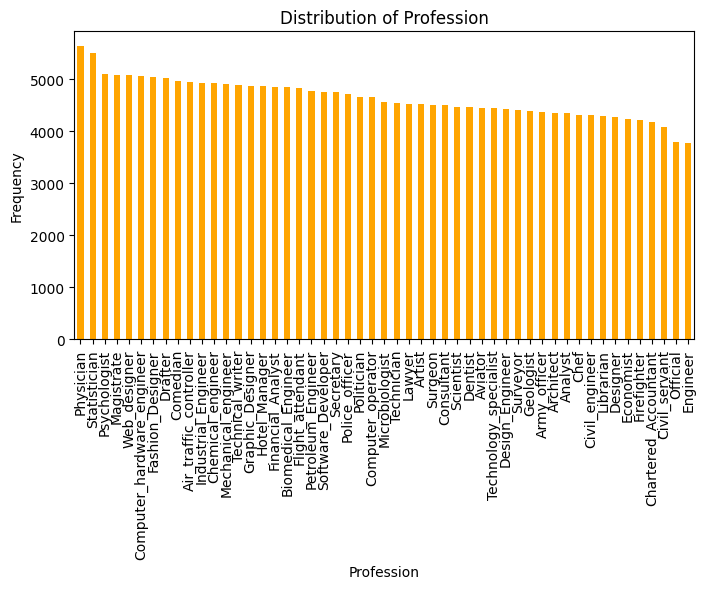

In [17]:
# Analysis of Profession
print('Frequency distribution for Profession:')
print(df['Profession'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['Profession'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Profession')
plt.xlabel('Profession')
plt.ylabel('Frequency')
plt.show()

Top 10 Professions

Frequency distribution for Top 10 Professions:
Profession
Physician                     5639
Statistician                  5507
Psychologist                  5096
Magistrate                    5087
Web_designer                  5074
Computer_hardware_engineer    5058
Fashion_Designer              5044
Drafter                       5030
Comedian                      4961
Air_traffic_controller        4950
Name: count, dtype: int64


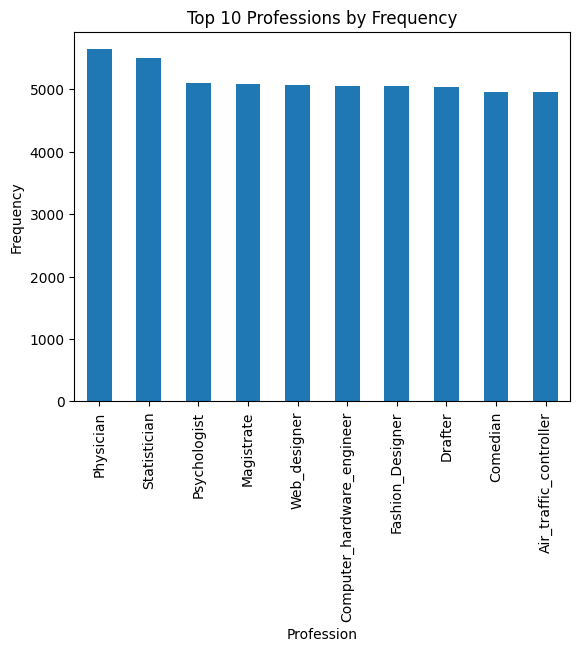

In [18]:
# Analysis of Top 10 Professions
print('Frequency distribution for Top 10 Professions:')
top_10_professions = df['Profession'].value_counts().head(10)
print(top_10_professions)

# Plot bar
plt.figure()
top_10_professions.plot(kind='bar')
plt.title('Top 10 Professions by Frequency')
plt.xlabel('Profession')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


Frequency distribution for CITY:
CITY
Vijayanagaram       1209
Bhopal              1150
Bulandshahr         1143
Saharsa[29]         1122
Vijayawada          1121
                    ... 
Ujjain               438
Bettiah[33]          414
Katni                410
Warangal[11][12]     409
Karaikudi            387
Name: count, Length: 317, dtype: int64


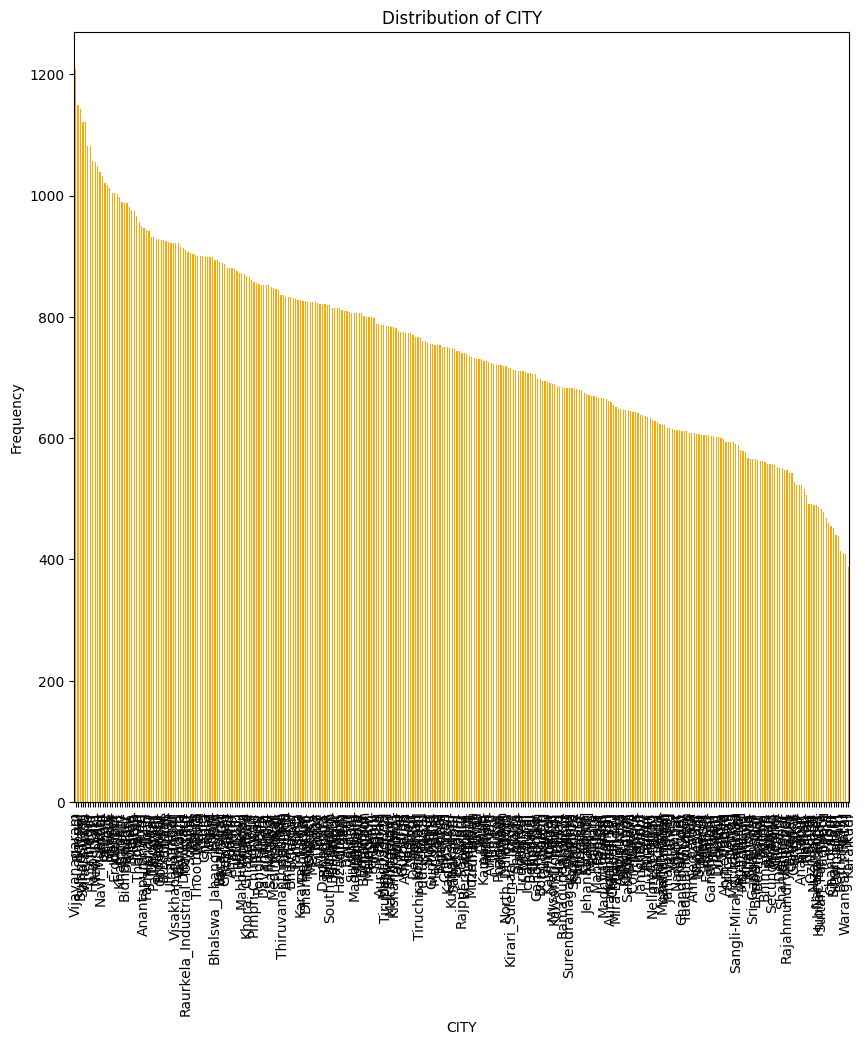

In [19]:
# Analysis of CITY
print('Frequency distribution for CITY:')
print(df['CITY'].value_counts())

# Plot bar chart
plt.figure(figsize=(10, 10))
df['CITY'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of CITY')
plt.xlabel('CITY')
plt.ylabel('Frequency')
plt.show()

Top 10 City

Frequency distribution for Top 10 Cities:
CITY
Vijayanagaram    1209
Bhopal           1150
Bulandshahr      1143
Saharsa[29]      1122
Vijayawada       1121
Indore           1082
Srinagar         1082
Hajipur[31]      1057
New_Delhi        1055
Satara           1048
Name: count, dtype: int64


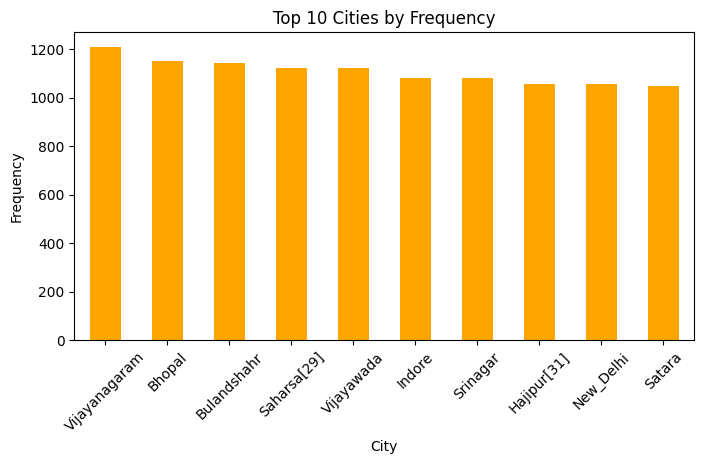

In [20]:
# Analysis of Top 10 Cities
print('Frequency distribution for Top 10 Cities:')
top_10_cities = df['CITY'].value_counts().head(10)
print(top_10_cities)

# Plot bar
plt.figure(figsize=(8, 4))
top_10_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Frequency')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Frequency distribution for STATE:
STATE
Uttar_Pradesh        26722
Maharashtra          24015
Andhra_Pradesh       23740
West_Bengal          22006
Bihar                18547
Tamil_Nadu           15540
Madhya_Pradesh       13260
Karnataka            11130
Gujarat              10747
Rajasthan             8567
Jharkhand             8441
Haryana               7362
Telangana             7003
Assam                 6675
Kerala                5447
Delhi                 5138
Punjab                4433
Odisha                4361
Chhattisgarh          3567
Uttarakhand           1768
Jammu_and_Kashmir     1663
Puducherry            1345
Mizoram                810
Manipur                808
Himachal_Pradesh       781
Tripura                751
Uttar_Pradesh[5]       684
Chandigarh             612
Sikkim                 542
Name: count, dtype: int64


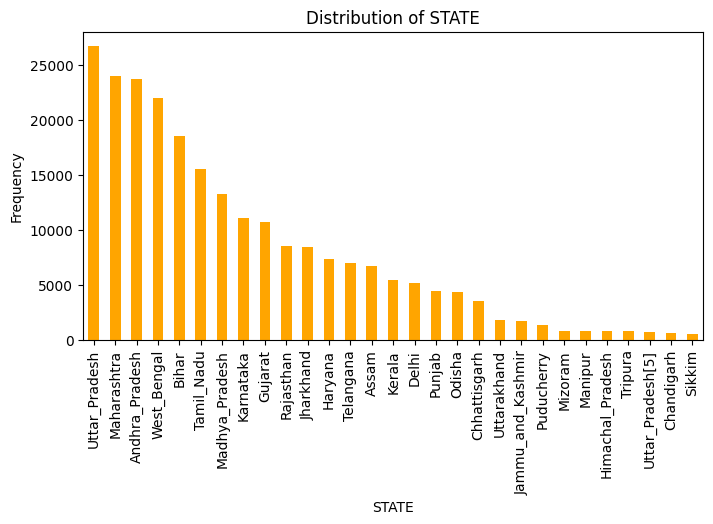

In [21]:
# Analysis of STATE
print('Frequency distribution for STATE:')
print(df['STATE'].value_counts())

# Plot bar chart
plt.figure(figsize=(8, 4))
df['STATE'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of STATE')
plt.xlabel('STATE')
plt.ylabel('Frequency')
plt.show()

#### 1.1.2 Multivariate analisis

##### 1.1.2.1 Numerical vs Risk_Flag

<Axes: >

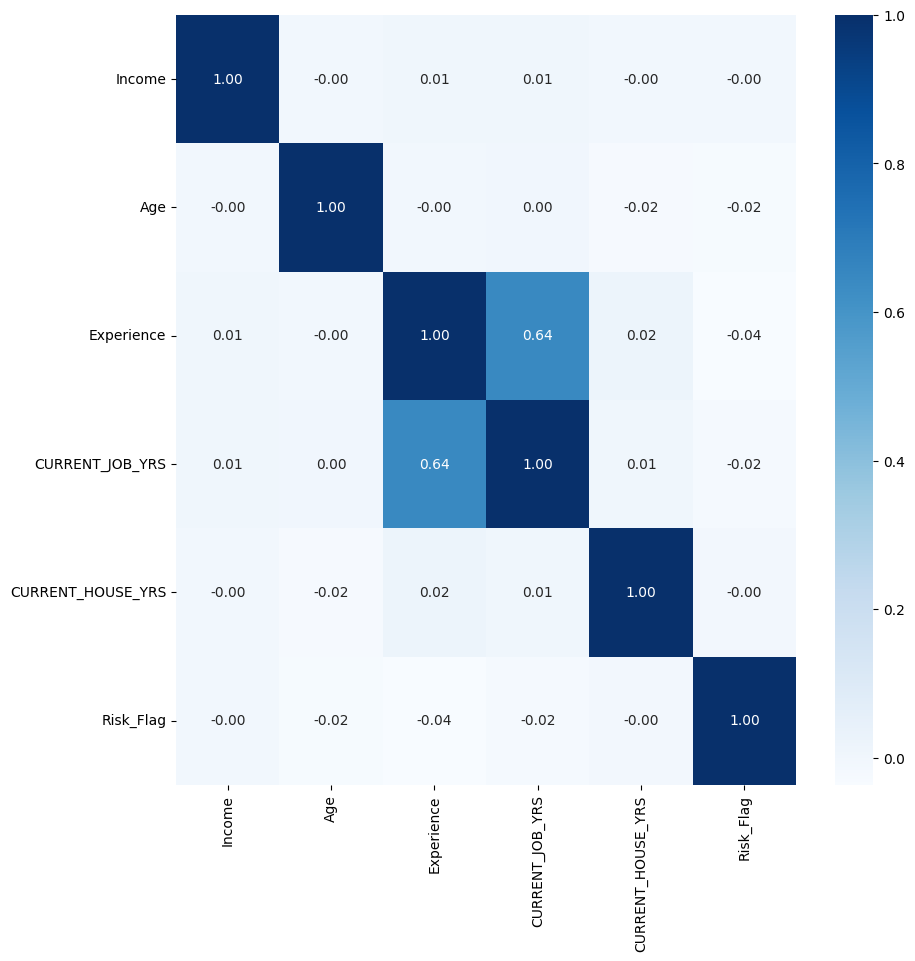

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

##### 1.1.2.2 Categorical vs Risk_Flag

<Axes: xlabel='Risk_Flag', ylabel='count'>

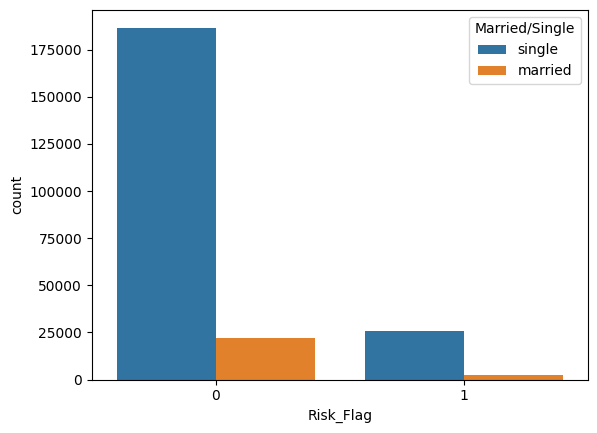

In [23]:
sns.countplot(data=df, x='Risk_Flag', hue='Married/Single')

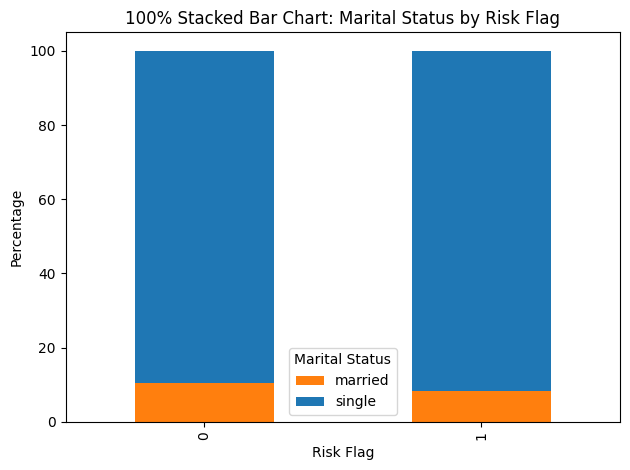

In [24]:
# Pivot table to calculate counts
pivot = df.pivot_table(index='Risk_Flag', columns='Married/Single', aggfunc='size', fill_value=0)

# Normalize counts to 100% for each risk_flag
pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_normalized.plot(kind='bar', stacked=True, color=['#ff7f0e', '#1f77b4'])
plt.ylabel('Percentage')
plt.xlabel('Risk Flag')
plt.title('100% Stacked Bar Chart: Marital Status by Risk Flag')
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

<Axes: xlabel='Risk_Flag', ylabel='count'>

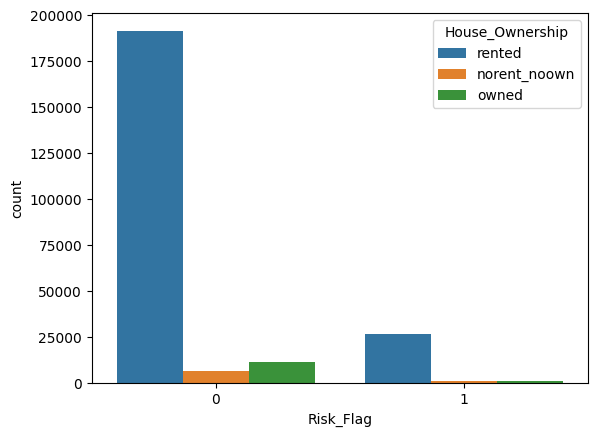

In [25]:
sns.countplot(data=df, x='Risk_Flag', hue='House_Ownership')

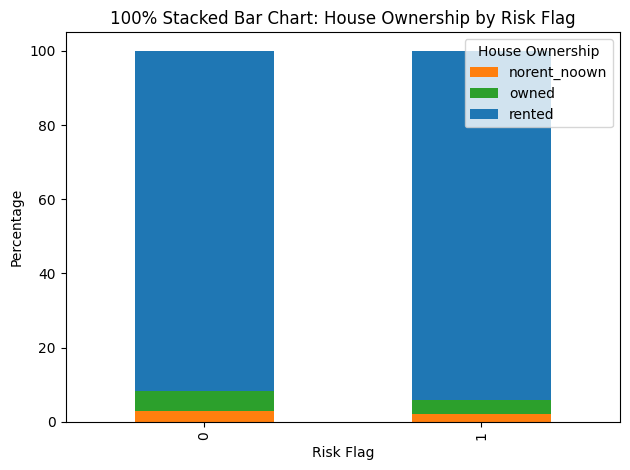

In [26]:
# Pivot table to calculate counts
pivot = df.pivot_table(index='Risk_Flag', columns='House_Ownership', aggfunc='size', fill_value=0)

# Normalize counts to 100% for each risk_flag
pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_normalized.plot(kind='bar', stacked=True, color=['#ff7f0e', '#2ca02c','#1f77b4'])
plt.ylabel('Percentage')
plt.xlabel('Risk Flag')
plt.title('100% Stacked Bar Chart: House Ownership by Risk Flag')
plt.legend(title='House Ownership')
plt.tight_layout()
plt.show()

<Axes: xlabel='Risk_Flag', ylabel='count'>

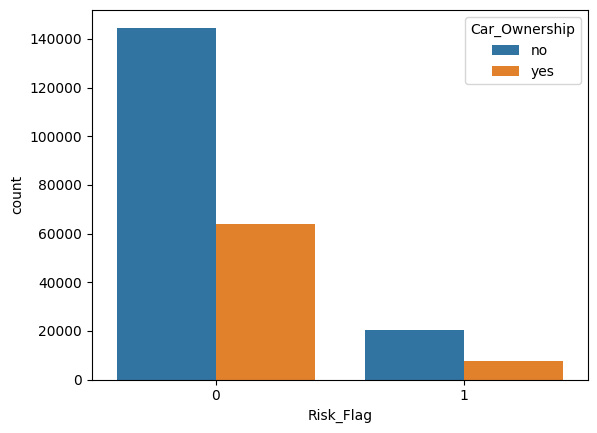

In [27]:
sns.countplot(data=df, x='Risk_Flag', hue='Car_Ownership')

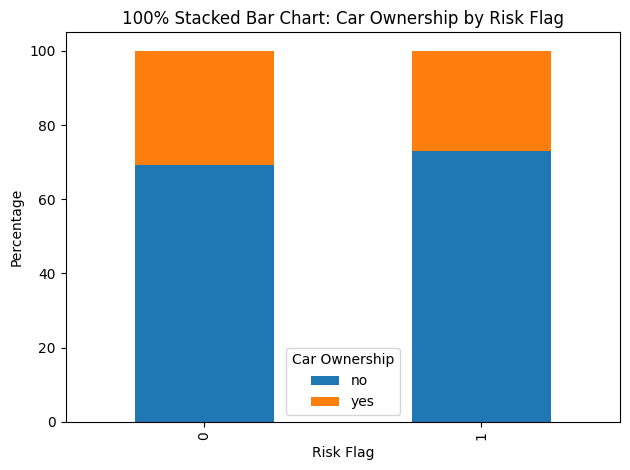

In [28]:
# Pivot table to calculate counts
pivot = df.pivot_table(index='Risk_Flag', columns='Car_Ownership', aggfunc='size', fill_value=0)

# Normalize counts to 100% for each risk_flag
pivot_normalized = pivot.div(pivot.sum(axis=1), axis=0) * 100

pivot_normalized.plot(kind='bar', stacked=True, color=['#1f77b4','#ff7f0e'])
plt.ylabel('Percentage')
plt.xlabel('Risk Flag')
plt.title('100% Stacked Bar Chart: Car Ownership by Risk Flag')
plt.legend(title='Car Ownership')
plt.tight_layout()
plt.show()

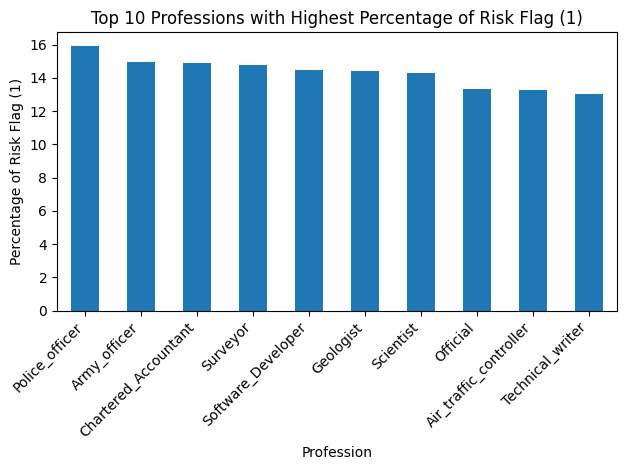

In [30]:
profession_risk = df.groupby('Profession')['Risk_Flag'].mean() * 100

# Get the top 10 professions by highest risk_flag percentage
top_10_professions = profession_risk.sort_values(ascending=False).head(10)

plt.figure()
top_10_professions.plot(kind='bar')
plt.title('Top 10 Professions with Highest Percentage of Risk Flag (1)')
plt.xlabel('Profession')
plt.ylabel('Percentage of Risk Flag (1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

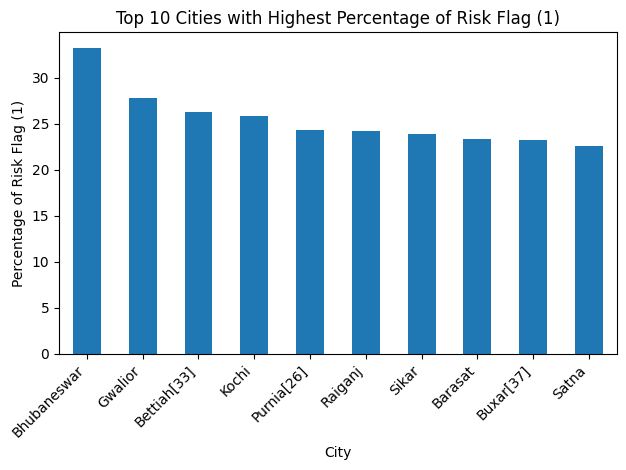

In [31]:
city_risk = df.groupby('CITY')['Risk_Flag'].mean() * 100

# Get the top 10 cities by highest risk_flag percentage
top_10_city = city_risk.sort_values(ascending=False).head(10)

plt.figure()
top_10_city.plot(kind='bar')
plt.title('Top 10 Cities with Highest Percentage of Risk Flag (1)')
plt.xlabel('City')
plt.ylabel('Percentage of Risk Flag (1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

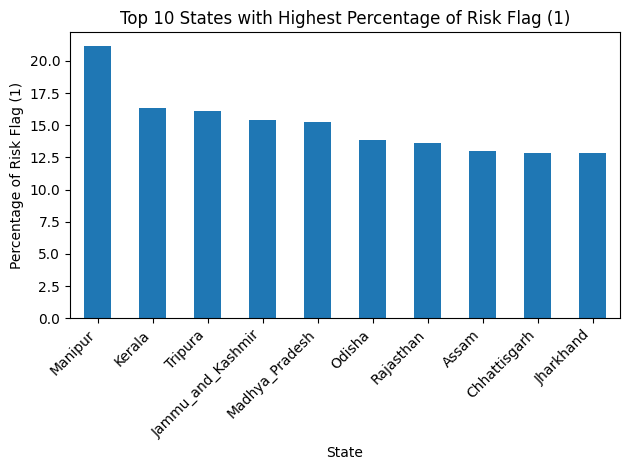

In [32]:
state_risk = df.groupby('STATE')['Risk_Flag'].mean() * 100

# Get the top 10 states by highest risk_flag percentage
top_10_state = state_risk.sort_values(ascending=False).head(10)

plt.figure()
top_10_state.plot(kind='bar')
plt.title('Top 10 States with Highest Percentage of Risk Flag (1)')
plt.xlabel('State')
plt.ylabel('Percentage of Risk Flag (1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 1.2 Preprocessing

#### 1.2.1 Check for missing values

In [42]:
# Cek kolom yang mempunyai row kosong
df.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


#### 1.2.2 Checking for duplicates

In [43]:
# mengecek data duplikat
df.duplicated().sum()

0

In [44]:
# memunculkan kolom STATE
a = df['STATE'].unique()

print(a)

['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Uttar_Pradesh[5]' 'Manipur' 'Sikkim']


In [45]:
# mengganti nama Uttar_Pradesh[5] menjadi Uttar_Pradesh
df['STATE'] = df['STATE'].str.replace(r'Uttar_Pradesh\[\d+\]','Uttar_Pradesh', regex=True)

print(df['STATE'].unique())

['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Manipur' 'Sikkim']


Dalam kolom State terdapat data yang memiliki nilai kategori yang kurang sesuai, yaitu Uttar_Pradesh[5] dan Uttar_Pradesh. Keduanya sebenarnya menggambarkan hal yang sama, namun ditulis dalam format yang berbeda. Untuk memastikan konsistensi data, nilai Uttar_Pradesh[5] diubah menjadi Uttar_Pradesh.

In [46]:
# memunculkan kolom CITY
a =  df['CITY'].unique()

print(a)

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamarhati'
 'Bhusawal' 'Sirsa' 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer'
 'Ongole' 'Miryalaguda' 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga'
 'Chennai' 'Gulbarga' 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi'
 'Howrah' 'Aurangabad[39]' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar'
 'Bellary' 'Danapur' 'Purnia[26]' 'Bijapur' 'Patiala' 'Malda' 'Sagar'
 'Durgapur' 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur'
 'Naihati' 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda'
 'Nadiad' 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru[25]'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhikode'

In [47]:
# Function to remove trailing numbers in square brackets
def clean_city_name(city):
    return re.sub(r'\[\d+\]', '', city)

# Apply cleaning to all cities
df['CITY'] = np.array([clean_city_name(city) for city in df['CITY']])

# memunculkan kolom CITY
a = df['CITY'].unique()

print(a)

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli' 'Jalgaon'
 'Tiruppur' 'Jamnagar' 'Kota' 'Karimnagar' 'Hajipur' 'Adoni' 'Erode'
 'Kollam' 'Madurai' 'Anantapuram' 'Kamarhati' 'Bhusawal' 'Sirsa'
 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer' 'Ongole' 'Miryalaguda'
 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga' 'Chennai' 'Gulbarga'
 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi' 'Howrah'
 'Aurangabad' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar' 'Bellary'
 'Danapur' 'Purnia' 'Bijapur' 'Patiala' 'Malda' 'Sagar' 'Durgapur'
 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur' 'Naihati'
 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda' 'Nadiad'
 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhikode' 'Vellore' 'Malegaon' 'Kochi' '

#### 1.2.3 Handling outlier

In [48]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    low_limit = Q1 - 1.5 * IQR
    high_limit = Q3 + 1.5 * IQR

    # Menandai outlier
    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

# Hasil
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 252000
Jumlah baris setelah memfilter outlier: 252000


### 1.3 Business Insight

Berikut Merupakan beberapa business insight dari hasil EDA diatas:
1. Profil Pendapatan Peminjam
*   Rata-rata pendapatan peminjam adalah sekitar 5 Juta Rupee per bulan, dengan rentang dari 10 Juta Rupee hinggan hampir 1 miliar per tahun.
*   Peminjam dengan pendapatan lebih tinggi cenderung mampu untuk membayar pinjaman
2.   Usia dan Pengalaman Kerja
*   Usia rata-rata adalah 50 tahun, dengan pengalaman kerja rata-rata 10 tahun.
*   Usia dan pengalaman kerja yang lebih tinggi menunjukkan stabilitas keuangan, meskipun usia lanjut bisa juga menambah risiko jika pembayaran dilakukan dalam jangka panjang.
3. Kepemilikan Aset
*   Sebagian besar peminjam tidak memiliki rumah sendiri (menyewa) dan tidak memiliki kendaraan pribadi.
*   Peminjam tanpa aset fisik seperti rumah atau mobil dianggap memiliki risiko lebih tinggi karena tidak memiliki jaminan jika terjadi gagal bayar.
4. Status Pernikahan
*   Mayoritas peminjam berstatus single. Ini berarti sebagian besar dari mereka tidak memiliki tanggungan keluarga, yang bisa mempengaruhi kemampuan mereka dalam mengelola keuangan.
5. Risiko Kredit
*   Sekitar 12,3% calon peminjam dalam kategori risiko tinggi, yang berpotensi mengalami kesulitan dalam melunasi pinjaman.
*   Identifikasi calon peminjam ini sangat penting untuk meminimalkan risiko gagal bayar.

### 1.4 Business Recommendation

1. Gunakan Teknologi Prediksi untuk Penilaian Risiko
*   Buat model machine learning untuk menilai risiko calon peminjam berdasarkan faktor-faktor seperti pendapatan, usia, kepemilikan aset, status pernikahan dan lokasi.
*   Model ini dapat membantu perusahaan menyaring calon peminjam dan menghindari pemberian kredit kepada mereka yang berisiko tinggi.
2. Segmentasi Calon Peminjam
*   Kelompok Risiko Rendah: berikan penawaran bungan rendah untuk menarik lebih banyak peminjam yang stabil.
*   Kelompok Risiko Tinggi: Terapkan syarat tambahan, seperti meminta agunan.
3. Strategi Berdasarkan Lokasi
*   Analisis lebih mendalam terhadap kota atau wilayah dengan konsentrasi risiko tinggi untuk memahami pola geografis riisko.
*   Fokuskan promosi di wilayah yang menunjukkan stabilitas keuangan lebih baik.
4. Monitoring Data dan Kualitas Informasi
*   Pastikan data calon peminjam lengkap dan akurat, terutama pada kolom seperti kepemilikan rumah, kendaraan, atau informasi pengalaman kerja dan pendapatan.
*   Dengan data yang lebih berkualitas, model prediksi akan memberikan hasil lebih akurat.
5. Berdasarkan heatmap ternyata kolom "Experience" dan "Current_Job_Yrs" mempunyai hubungan yang kuat, salah satu dari kolomnya harus di drop untuk menghindari multikolinearitas.









## 2. Stage 2

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### 2.1 Feature Engineering

#### 2.1.1 Encoding

In [49]:
# Categorical data yang menggunakan Label Encoding
df['Married/Single'] = df['Married/Single'].map({'married': 1, 'single': 0})
df['House_Ownership'] = df['House_Ownership'].map({'norent_noown':0,'rented': 1, 'owned': 2})
df['Car_Ownership'] = df['Car_Ownership'].map({'yes': 1, 'no': 0})

#### 2.1.2 New Features

In [52]:
# Feature CMI (untuk handle Experience x CURRENT_JOB_YRS multicolinearity)
mm_scaler = MinMaxScaler()
df[['Experience_Norm', 'CURRENT_JOB_YRS_Norm']] = mm_scaler.fit_transform(df[['Experience', 'CURRENT_JOB_YRS']])

# Define weights
alpha = 0.8  # Weight for Experience
beta = 0.2   # Weight for CURRENT_JOB_YRS

# *New Feature - Career Maturity Index (CMI)*
df['CMI'] = alpha * df['Experience_Norm'] + beta * df['CURRENT_JOB_YRS_Norm']

In [53]:
# Feature job_encoded (dari 'Profession')
job_groups = {
    'Engineering': ['Mechanical_engineer', 'Civil_engineer', 'Chemical_engineer', 'Design_Engineer',
                    'Computer_hardware_engineer', 'Petroleum_Engineer', 'Industrial_Engineer', 'Engineer'],
    'IT/Software': ['Software_Developer', 'Web_designer', 'Computer_operator', 'Technology_specialist'],
    'Creative': ['Graphic_Designer', 'Technical_writer', 'Fashion_Designer', 'Artist', 'Designer'],
    'Healthcare': ['Physician', 'Dentist', 'Surgeon', 'Psychologist', 'Biomedical_Engineer'],
    'Management': ['Hotel_Manager', 'Consultant', 'Architect', 'Official', 'Chef', 'Analyst'],
    'Legal/Government': ['Politician', 'Magistrate', 'Lawyer', 'Civil_servant', 'Police_officer', 'Firefighter', 'Army_officer'],
    'Financial': ['Financial_Analyst', 'Chartered_Accountant', 'Economist'],
    'Science/Research': ['Scientist', 'Geologist', 'Microbiologist', 'Statistician', 'Technician'],
    'Aviation': ['Flight_attendant', 'Air_traffic_controller', 'Aviator'],
    'Miscellaneous': ['Librarian', 'Secretary', 'Drafter', 'Comedian', 'Surveyor']
}

# Map job positions to groups
df['job_groups'] = df['Profession'].map({job: group for group, jobs in job_groups.items() for job in jobs})


# K-Fold Target Encoding
kf = KFold(n_splits=5, shuffle=True, random_state=42)
df['job_encoded'] = 0

for train_idx, val_idx in kf.split(df):
    # Create views of the training and validation data
    X_train_fold, X_val_fold = df.iloc[train_idx], df.iloc[val_idx]
    # Calculate mean Risk_Flag for each job group in training data
    job_mean = X_train_fold.groupby('job_groups')['Risk_Flag'].mean()

    # Apply encoding to validation set using the view
    df.loc[val_idx, 'job_encoded'] = X_val_fold['job_groups'].map(job_mean)

# Fill NaN values (for unseen categories) with global mean
df['job_encoded'].fillna(df['Risk_Flag'].mean(), inplace=True)
df['job_encoded'] = mm_scaler.fit_transform(df[['job_encoded']])

In [54]:
# Feature community_type (dari 'CITY' dan 'STATE' informasi dari https://en.wikipedia.org/wiki/Classification_of_Indian_cities)
tier_1_cities = [
    "Ahmedabad", "Bangalore", "Chennai", "Delhi",
    "Hyderabad", "Kolkata", "Mumbai", "Pune"
]

tier_2_cities = [
    "Agra", "Amritsar", "Aurangabad", "Bhopal", "Coimbatore",
    "Indore", "Jaipur", "Kanpur", "Lucknow", "Nagpur",
    "Patna", "Surat", "Vadodara", "Visakhapatnam"
]

# Assign Community Type
def assign_community(city):
    if city in tier_1_cities:
        return 2
    elif city in tier_2_cities:
        return 1
    else:
        return 0

df['community_type'] = df['CITY'].apply(assign_community)

In [55]:
# Scaling
df['Income'] = mm_scaler.fit_transform(df[['Income']])
df['Age'] = mm_scaler.fit_transform(df[['Age']])
df['CURRENT_HOUSE_YRS'] = mm_scaler.fit_transform(df[['CURRENT_HOUSE_YRS']])
df['community_type'] = mm_scaler.fit_transform(df[['community_type']])
df['House_Ownership'] = mm_scaler.fit_transform(df[['House_Ownership']])

In [56]:
X = df.drop(columns=['Id', 'Profession', 'Experience', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
                    'Risk_Flag', 'Experience_Norm', 'CURRENT_JOB_YRS_Norm', 'job_groups'])
y = df['Risk_Flag']

<Axes: >

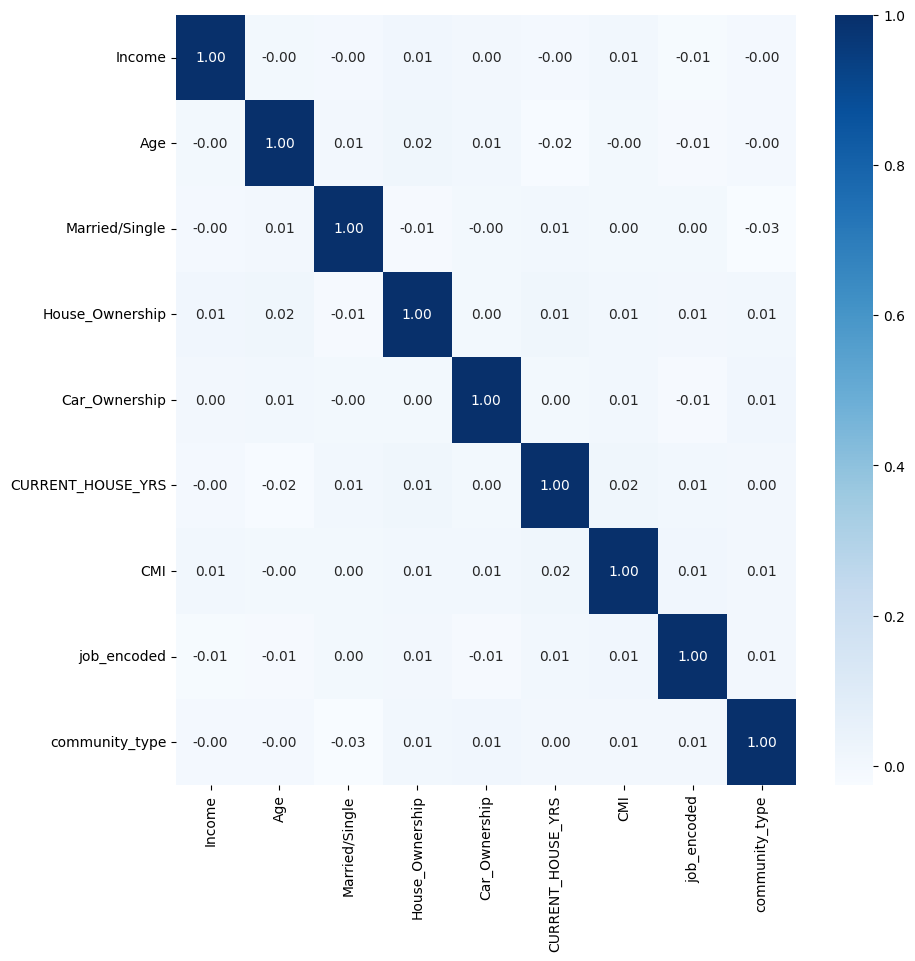

In [57]:
# Cek apakah masih ada multicolinearity
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), cmap='Blues', annot=True, fmt='.2f')

In [58]:
X.tail(10)

,Income,Age,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,CMI,job_encoded,community_type
251990,0.033911,0.810345,0,0.5,0,0.25,0.217143,0.324214,0.0
251991,0.682508,0.258621,0,1.0,0,0.75,0.597143,0.379150,0.5
251992,0.754927,0.620690,1,0.5,0,0.50,0.337143,0.619525,0.0
251993,0.813916,0.672414,0,0.5,0,0.75,0.528571,0.655717,0.0
251994,0.721285,0.103448,0,0.5,0,0.00,0.434286,0.988370,0.0
251995,0.815303,0.379310,0,0.5,0,0.25,0.605714,0.405840,1.0
251996,0.283620,0.086207,0,0.5,0,0.25,0.485714,0.972146,0.0
251997,0.451682,0.431034,0,0.5,0,0.50,0.380000,0.025255,0.0
251998,0.650356,0.413793,0,0.5,0,0.00,0.000000,0.426794,0.0
251999,0.906933,0.844828,0,0.5,0,0.25,0.780000,0.894181,0.0


### 2.2 Modeling

#### 2.2.1 Training Data for Model Selection

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print(confusion_matrix(y_test, y_pred))
    print("Accuracy (Validation Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Validation Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Validation Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Validation Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (Validation-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

##### 2.2.1.1 Logistic Regression

In [61]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train, y_train)
eval_classification(logreg)

[[34070 32259]
 [ 4169  5102]]
Accuracy (Validation Set): 0.52
Accuracy (Train Set): 0.52
Precision (Validation Set): 0.14
Recall (Validation Set): 0.55
F1-Score (Validation Set): 0.22
roc_auc (Validation-proba): 0.55
roc_auc (train-proba): 0.54
recall (crossval train): 0.54984519238953
recall (crossval test): 0.5295209893375102


##### 2.2.1.2 Random Forest

In [62]:
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X_train, y_train)
eval_classification(rf)

[[61373  4956]
 [ 2969  6302]]
Accuracy (Validation Set): 0.90
Accuracy (Train Set): 0.93
Precision (Validation Set): 0.56
Recall (Validation Set): 0.68
F1-Score (Validation Set): 0.61
roc_auc (Validation-proba): 0.92
roc_auc (train-proba): 0.97
recall (crossval train): 0.9861837201801812
recall (crossval test): 0.7019510743147958


##### 2.2.1.3 Decision Tree

In [63]:
dt = DecisionTreeClassifier(class_weight="balanced")
dt.fit(X_train, y_train)
eval_classification(dt)

[[59039  7290]
 [ 2234  7037]]
Accuracy (Validation Set): 0.87
Accuracy (Train Set): 0.93
Precision (Validation Set): 0.49
Recall (Validation Set): 0.76
F1-Score (Validation Set): 0.60
roc_auc (Validation-proba): 0.82
roc_auc (train-proba): 0.98
recall (crossval train): 0.9997015725750847
recall (crossval test): 0.8006031878190552


##### 2.2.1.4 Extra Tree Classifier

In [64]:
etree = ExtraTreesClassifier(class_weight="balanced")
etree.fit(X_train, y_train)
eval_classification(etree)

[[61028  5301]
 [ 2719  6552]]
Accuracy (Validation Set): 0.89
Accuracy (Train Set): 0.93
Precision (Validation Set): 0.55
Recall (Validation Set): 0.71
F1-Score (Validation Set): 0.62
roc_auc (Validation-proba): 0.91
roc_auc (train-proba): 0.98
recall (crossval train): 0.9997015725750847
recall (crossval test): 0.7438602428071125


##### 2.2.1.5 XGboost

In [ ]:
xgboost = XGBClassifier(class_weight="balanced")
xgboost.fit(X_train, y_train)
eval_classification(xgboost)

[[65587   742]
 [ 7909  1362]]
Accuracy (Validation Set): 0.89
Accuracy (Train Set): 0.89
Precision (Validation Set): 0.65
Recall (Validation Set): 0.15
F1-Score (Validation Set): 0.24
roc_auc (Validation-proba): 0.87
roc_auc (train-proba): 0.91
recall (crossval train): 0.17485395445539478
recall (crossval test): 0.14179675702116365


#### 2.2.2 Tune Best Model

In [68]:
# Define Decision Tree model
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Define hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 10, 15, 20],
    "min_samples_split": [5, 10, 20, 50],
    "min_samples_leaf": [2, 5, 10, 20],
    "criterion": ["gini", "entropy"],
    "max_features": [None, "sqrt", "log2"]
}

# Perform Grid Search with 5-Fold CV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="recall", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best model
best_dt = grid_search.best_estimator_

# Predictions
y_pred = best_dt.predict(X_test)

# Print best parameters and recall score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

# Evaluate Model Performance
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5}
Best Recall Score: 0.7855926352128884
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     66329
           1       0.33      0.75      0.45      9271

    accuracy                           0.78     75600
   macro avg       0.64      0.77      0.66     75600
weighted avg       0.88      0.78      0.81     75600



#### 2.2.3 Final Model Training on Full Training Data

In [70]:
X_final_train = pd.concat([X_train, X_test], axis=0)
y_final_train = pd.concat([y_train, y_test], axis=0)

print(f"Ukuran data final untuk training: {X_final_train.shape}")

Ukuran data final untuk training: (252000, 9)


In [71]:
final_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=10,
    min_samples_split=5,
    random_state=42,
    class_weight="balanced"
)
final_model.fit(X_final_train, y_final_train)

print("✅ Final Model telah dilatih dengan seluruh data training!")

✅ Final Model telah dilatih dengan seluruh data training!


In [72]:
from sklearn.model_selection import cross_val_score

# Evaluasi model dengan cross-validation (scoring = recall)
recall_scores = cross_val_score(final_model, X_final_train, y_final_train, cv=5, scoring="recall")

print(f"📊 Recall Score (Cross-Validation): {recall_scores.mean():.4f}")

📊 Recall Score (Cross-Validation): 0.7619


### 2.2.4 Feature Importance

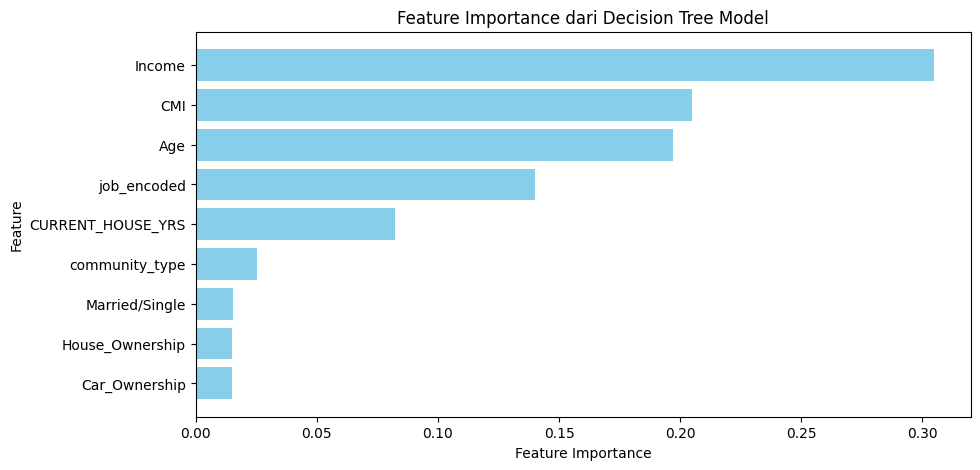

In [73]:
feature_importance = final_model.feature_importances_

feature_df = pd.DataFrame({'Feature': X_final_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(feature_df["Feature"], feature_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance dari Decision Tree Model")
plt.gca().invert_yaxis()
plt.show()